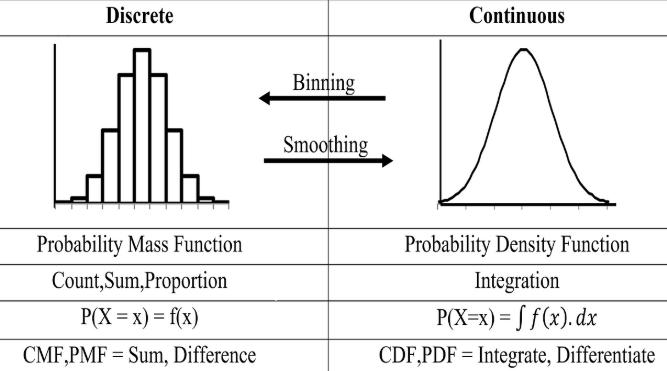

## Distribution ofe Random Variables (Probability in Y axis)

#### Play with 1 Dice : PMF (Probability Mass Function)

In [1]:
import pandas as pd
import random

In [2]:
L =[] #Emply List

In [3]:
# Appening into empty list
for i in range (10000):
   L.append(random.randint(1,6))

In [4]:
len(L)

10000

In [5]:
L[:5]

[6, 6, 1, 3, 6]

In [6]:
# Convert List into Series
pd.Series(L)

0       6
1       6
2       1
3       3
4       6
       ..
9995    5
9996    1
9997    2
9998    2
9999    4
Length: 10000, dtype: int64

In [7]:
pd.Series(L).value_counts()

1    1708
4    1689
2    1671
5    1667
6    1663
3    1602
Name: count, dtype: int64

In [8]:
pd.Series(L).value_counts().sum()

10000

In [9]:
# Probability of each value
s=pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()
s=s.sort_index() # arranging 1 to 6 event
s

1    0.1708
2    0.1671
3    0.1602
4    0.1689
5    0.1667
6    0.1663
Name: count, dtype: float64

<Axes: >

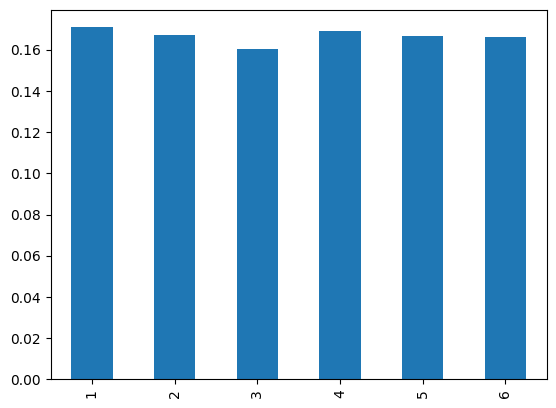

In [10]:
#Plot Chart
s.plot(kind='bar')

#### Play with 2 Dice : PMF (Probability Mass Function)

In [11]:
L2=[]
# Appening into empty list
for i in range (10000):
   a=random.randint(1,6) # 1st dice
   b=random.randint(1,6) # 2nd dice
   L2.append(a+b)

In [12]:
len(L2)

10000

In [13]:
L2[:5]

[6, 11, 8, 8, 11]

In [14]:
s2=(pd.Series(L2).value_counts()/pd.Series(L2).value_counts().sum()).sort_index()
s2

2     0.0277
3     0.0578
4     0.0828
5     0.1111
6     0.1396
7     0.1608
8     0.1362
9     0.1110
10    0.0862
11    0.0600
12    0.0268
Name: count, dtype: float64

<Axes: >

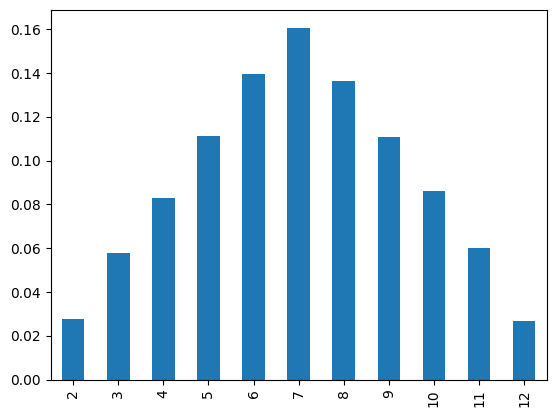

In [15]:
#Plot Chart
s2.plot(kind='bar') # the probability of 7 is max.

#### Play with 2 Dice : CDF (Cumulative Distribution Function) For 2 Dice PMF
Max. Probability is 1

In [16]:
import numpy as np

In [17]:
s2_cdf = np.cumsum(s2)
s2_cdf

2     0.0277
3     0.0855
4     0.1683
5     0.2794
6     0.4190
7     0.5798
8     0.7160
9     0.8270
10    0.9132
11    0.9732
12    1.0000
Name: count, dtype: float64

<Axes: >

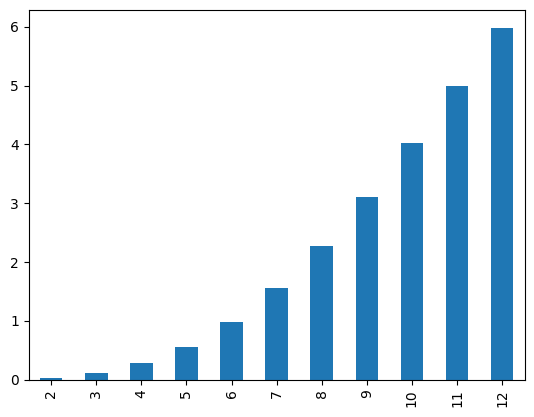

In [18]:
#Plot Chart
np.cumsum(s2_cdf).plot(kind='bar')

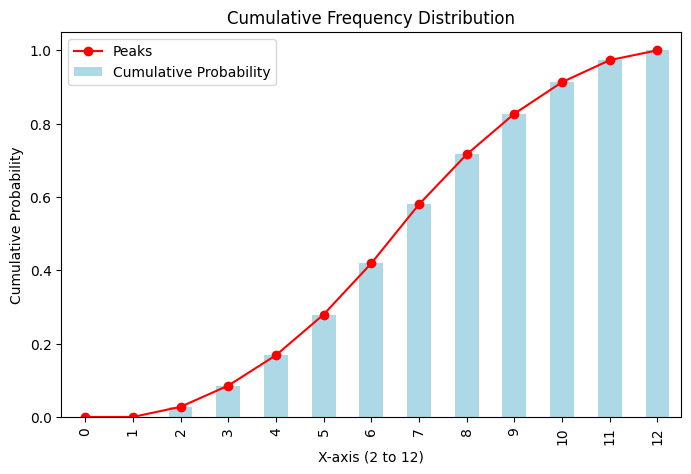

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure cumulative frequency starts from 0 at x=0 and x=1
s2_cdf = pd.concat([pd.Series([0, 0], index=[0, 1]), s2_cdf])  # Adding 0 at x=0 and x=1

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot cumulative frequency bar chart
s2_cdf.plot(kind="bar", ax=ax, color="lightblue", label="Cumulative Probability")

# Plot a line connecting the peaks
ax.plot(s2_cdf.index, s2_cdf.values, marker="o", linestyle="-", color="red", label="Peaks")

# Formatting the chart
ax.set_xlabel("X-axis (2 to 12)")
ax.set_ylabel("Cumulative Probability")
ax.set_title("Cumulative Frequency Distribution")
ax.set_xticks(s2_cdf.index)  # Ensure correct x-axis labels
ax.legend()

plt.show()



## PDF (Probability Density Function)

## Probability Of Continuous Random Values (Probability Density in Y axis)
1. As in X axix the are infinite values we can think as it is continuous so Probability will not hold here
2. We can define a range of value here unlike discrete values
3. Here Y axis represents the probability to find a number between a range, and hence it is called probability density.
4. The area under the PDF curve is equal to 1
5. We need to integrate between the ranges to get the area under the curve.

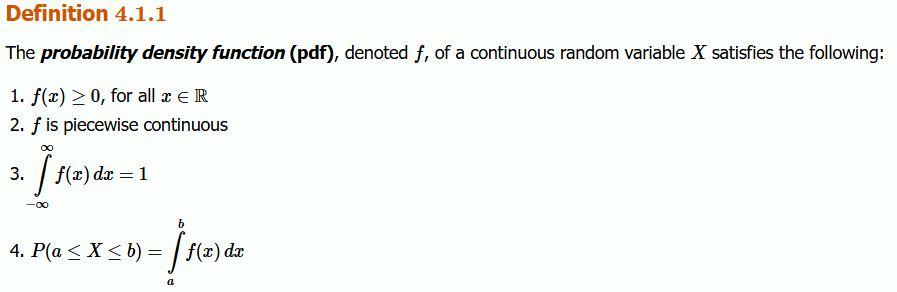

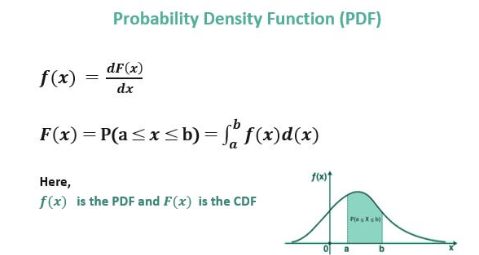

#### We know how to find probability. But now question is how we can find the Probability Density ?
1. We need to do Density Estimation for Probability Density.
2. There ate two ways
   A) Parametric : Data follows a specific distribution like Normal (https://chrispiech.github.io/probabilityForComputerScientists/en/part2/normal/),         Uniform, Poisson etc.
   B) Non-Parametric : No specific assumption on distribution and directly estimate from data.
4. We use KDE (kernel density estimation), histogram, Gaussian mixture model.

#### Parametric Density Estimation ( Depends on Parameter Value Mean and sd )

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [21]:
# creating a Sample Normal Distribution with 1000 data set, population mean=50 and population sd=5
# Note: The mean of the sample may not be exactly 50 as population mean, but close to 50
sample = normal(loc=50, scale=5, size=1000)  
sample

array([56.58071302, 57.95330908, 49.88991244, 50.95798078, 57.15457779,
       57.18090788, 50.12458134, 47.72276142, 50.73892676, 48.35702121,
       50.39598331, 45.3516952 , 52.93637072, 43.93338584, 54.7292656 ,
       51.84146837, 53.6188155 , 37.58440147, 48.28100877, 48.80073214,
       48.98979043, 41.10079494, 39.81453163, 52.14015712, 48.73018845,
       49.3227354 , 51.2961706 , 46.15422935, 43.86922424, 49.18756787,
       52.92286897, 50.66865705, 49.33380578, 50.61894032, 54.26462216,
       53.27393561, 50.253332  , 56.06354966, 48.26077592, 60.23904052,
       50.79801501, 47.52927547, 57.17579053, 41.71087232, 54.65867412,
       53.43176092, 44.40080771, 44.4624535 , 49.55159802, 48.39680259,
       48.14491954, 55.6806833 , 50.03057802, 56.9727098 , 59.58055513,
       46.80318749, 44.53108929, 48.42285728, 43.93561911, 48.85938107,
       51.77749612, 42.69645423, 38.92798615, 55.09147816, 54.99077233,
       43.9811978 , 49.27758353, 52.20583061, 45.98926131, 46.24

In [22]:
sample.mean() # as it is sample data so it will not be exactly 50, but close to it

49.7910984043908

(array([ 2.,  1.,  4.,  1.,  3.,  2.,  3.,  5.,  8.,  5.,  8.,  8., 15.,
        12., 15., 31., 31., 24., 29., 41., 43., 46., 42., 51., 47., 44.,
        49., 50., 42., 32., 40., 27., 34., 32., 32., 26., 28., 19., 20.,
         8., 12.,  3.,  5., 11.,  0.,  3.,  2.,  2.,  0.,  2.]),
 array([34.93934843, 35.51901755, 36.09868667, 36.67835579, 37.25802492,
        37.83769404, 38.41736316, 38.99703228, 39.5767014 , 40.15637052,
        40.73603964, 41.31570876, 41.89537788, 42.475047  , 43.05471612,
        43.63438524, 44.21405436, 44.79372348, 45.3733926 , 45.95306172,
        46.53273084, 47.11239996, 47.69206908, 48.2717382 , 48.85140732,
        49.43107644, 50.01074556, 50.59041469, 51.17008381, 51.74975293,
        52.32942205, 52.90909117, 53.48876029, 54.06842941, 54.64809853,
        55.22776765, 55.80743677, 56.38710589, 56.96677501, 57.54644413,
        58.12611325, 58.70578237, 59.28545149, 59.86512061, 60.44478973,
        61.02445885, 61.60412797, 62.18379709, 62.76346621,

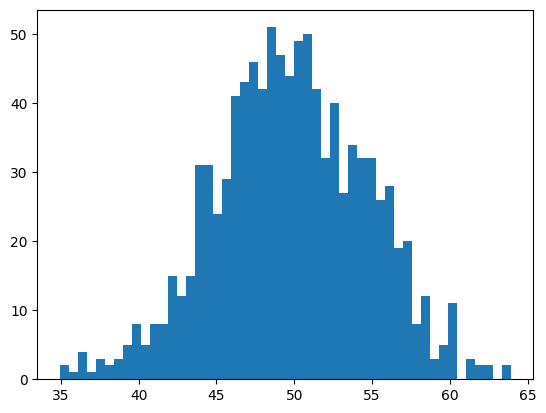

In [23]:
#plot histogram
plt.hist(sample,bins=50)

#### From the above plot we see it is close to normal distribution. So we will draw PDF for normal distribution

In [24]:
# calculate sample mean and standard deviation of the sample data
sample_mean=sample.mean()
sample_std=sample.std()

In [25]:
# fit to the Normal Distribution with the above parameters
from scipy.stats import norm
dist=norm(sample_mean, sample_std)

In [26]:
# Find Min and Max value in sample data set
print( sample.min() )
print( sample.max() )

34.93934843366958
63.92280445516297


In [27]:
# Dividing the range between Min and Max into 100 data points
values_100 = np.linspace( sample.min(), sample.max(), 100 )
values_100

array([34.93934843, 35.23211062, 35.5248728 , 35.81763498, 36.11039716,
       36.40315934, 36.69592153, 36.98868371, 37.28144589, 37.57420807,
       37.86697025, 38.15973244, 38.45249462, 38.7452568 , 39.03801898,
       39.33078116, 39.62354335, 39.91630553, 40.20906771, 40.50182989,
       40.79459207, 41.08735426, 41.38011644, 41.67287862, 41.9656408 ,
       42.25840298, 42.55116517, 42.84392735, 43.13668953, 43.42945171,
       43.72221389, 44.01497608, 44.30773826, 44.60050044, 44.89326262,
       45.1860248 , 45.47878699, 45.77154917, 46.06431135, 46.35707353,
       46.64983572, 46.9425979 , 47.23536008, 47.52812226, 47.82088444,
       48.11364663, 48.40640881, 48.69917099, 48.99193317, 49.28469535,
       49.57745754, 49.87021972, 50.1629819 , 50.45574408, 50.74850626,
       51.04126845, 51.33403063, 51.62679281, 51.91955499, 52.21231717,
       52.50507936, 52.79784154, 53.09060372, 53.3833659 , 53.67612808,
       53.96889027, 54.26165245, 54.55441463, 54.84717681, 55.13

#### PDF Formula for Normal Distribution
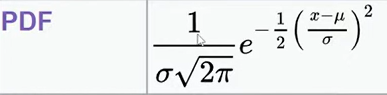

In [28]:
# calculating probabilities for every 100 data point (x) with the data distribution for dist=norm(sample_mean, sample_std)
probability_density = [ dist.pdf(x) for x in values_100 ]

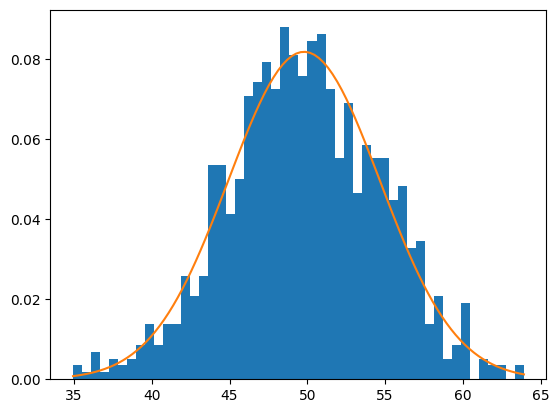

In [29]:
# Plot Histogram of Sample Data
plt.hist(sample,bins=50, density=True)    # "density=True" for plotting histogram of sample data (50 bins) in wrt probability density
plt.plot(values_100, probability_density) # Probability distribution curve based on PDF formula on sample data

#### Non-Parametric Density Estimation (KDE - Kernel Density Estimation)
Advantages:
 1. It does not require any assumption of a specific distribution.
 2. It can estimate the probability density of any unknown and complex distribution pattern.
 3. It does not use the mean or sd , but is uses the underlying data.
Disadvantage
 1. It requires more data to make accurate in comparison to parametric.
 2. Takes more time for computation

To get a sense of the data distribution, we draw probability density functions (PDF). We are pleased when data fit well to a common density function, such as normal, Poisson, geometrical, etc. Then, the maximum likelihood approach can be used to fit the density function to the data.
Unfortunately, the data distribution is sometimes too irregular and does not resemble any of the usual PDFs. In such cases, the Kernel Density Estimator (KDE) provides a rational and visually pleasant representation of the data distribution.

The Kernel Function
The key to understanding KDE is to think of it as a function made up of building blocks, similar to how different objects are made up of Lego bricks. The distinctive feature of KDE is that it employs only one type of brick, known as the kernel (‘one brick to rule them all‘). The key property of this brick is the ability to shift and stretch/shrink. Each datapoint is given a brick, and KDE is the sum of all bricks.

Kernel density estimates are closely related to histograms, but can be endowed with properties such as smoothness or continuity by using a suitable kernel. The diagram below based on these 6 data points illustrates this relationship:

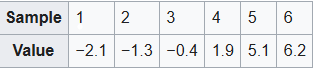

For the histogram, first, the horizontal axis is divided into sub-intervals or bins which cover the range of the data: In this case, six bins each of width 2. Whenever a data point falls inside this interval, a box of height 1/12 is placed there. If more than one data point falls inside the same bin, the boxes are stacked on top of each other.

For the kernel density estimate, normal kernels with a standard deviation of 1.5 (indicated by the red dashed lines) are placed on each of the data points xi. The kernels are summed to make the kernel density estimate (solid blue curve). The smoothness of the kernel density estimate (compared to the discreteness of the histogram) illustrates how kernel density estimates converge faster to the true underlying density for continuous random variables.
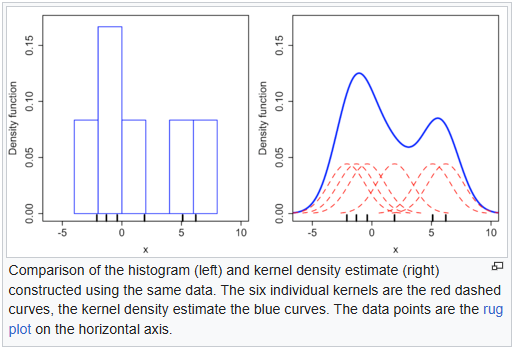

## What is KDE?

### <span style="color:blue;">Non-parametric:</span>
KDE doesn't assume a specific underlying distribution like a Gaussian, making it flexible for various data shapes.  

### <span style="color:blue;">Density Estimation:</span>
It estimates the probability density function (PDF) of a random variable, which describes the likelihood of observing different values.  

### <span style="color:blue;">Smooth Curve:</span>
KDE creates a smooth curve from sampled data, representing the underlying density distribution.  

### <span style="color:blue;">Kernel Function:</span>
KDE uses a "kernel" function (like Gaussian) to smooth the data, with a "bandwidth" parameter controlling the smoothing level.  

### <span style="color:blue;">Alternative to Histograms:</span>
KDE provides a smoother representation of data distribution compared to histograms.  


## Python Libraries for KDE:

### SciPy:
The <span style="color:blue;">scipy.stats.gaussian_kde</span> function provides a Gaussian kernel density estimate.

### Scikit-learn:
The <span style="color:blue;">sklearn.neighbors.KernelDensity</span> estimator offers flexibility in choosing kernels and bandwidths.

### Statsmodels:
The <span style="color:blue;">statsmodels.nonparametric.KDEUnivariate</span> class provides another option for KDE estimation.

### Seaborn:
Seaborn's <span style="color:blue;">seaborn.kdeplot</span> function facilitates visualizing KDE plots.


In [32]:
# We create a bimodal distribution: a mixture of two normal distributions with different locations
# Generate Two Normal Sample Data
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
# Mix Two Normally Distributed Data Set
sample_kde = np.hstack( (sample1,sample2) )

sample_kde

array([27.22677006, 13.80777385, 15.94259085, 27.8796152 , 21.99882216,
        9.41280984, 21.91612295, 29.17651552, 12.26096202, 19.53772567,
       20.90915957, 15.83652647, 19.81330003, 19.86833686, 15.41888875,
       19.54175725, 26.17553206, 22.54283967, 16.20231613, 12.67685821,
       10.40802351, 13.87482653, 17.29081819, 10.80627895, 23.22411785,
       12.52730829, 23.07052415, 27.63867396, 28.9988379 , 21.77585196,
       23.53351465, 17.17731454, 25.43514226, 12.24037365, 20.3212579 ,
       22.58453495, 12.47825066, 21.88387917, 11.43238983, 14.43258683,
       26.55595808, 13.74684538, 20.21968896, 23.51126258, 33.17491513,
       16.64938191, 21.59196776, 23.01848511, 19.53921832, 24.6948758 ,
       20.61496176, 24.66779454, 22.12293775,  7.10317553, 19.86131436,
       20.45964933, 16.83203248, 28.20291964, 14.04756348, 25.00843385,
       12.50018023, 19.3664576 , 21.63146655, 12.98883217, 20.87500732,
       17.07063086, 18.07213682, 15.51068536, 17.97410741, 18.64

(array([ 3.,  1.,  2.,  6.,  2., 10.,  9.,  9., 14., 19., 21., 32., 17.,
        24., 18., 19., 25., 20., 11., 12., 10., 12., 11., 13., 14., 17.,
        25., 21., 30., 36., 48., 44., 44., 51., 54., 52., 48., 42., 48.,
        23., 28., 11., 12., 15.,  8.,  3.,  3.,  0.,  2.,  1.]),
 array([ 7.10317553,  8.07397327,  9.04477101, 10.01556875, 10.98636649,
        11.95716423, 12.92796196, 13.8987597 , 14.86955744, 15.84035518,
        16.81115292, 17.78195066, 18.75274839, 19.72354613, 20.69434387,
        21.66514161, 22.63593935, 23.60673709, 24.57753483, 25.54833256,
        26.5191303 , 27.48992804, 28.46072578, 29.43152352, 30.40232126,
        31.37311899, 32.34391673, 33.31471447, 34.28551221, 35.25630995,
        36.22710769, 37.19790543, 38.16870316, 39.1395009 , 40.11029864,
        41.08109638, 42.05189412, 43.02269186, 43.99348959, 44.96428733,
        45.93508507, 46.90588281, 47.87668055, 48.84747829, 49.81827603,
        50.78907376, 51.7598715 , 52.73066924, 53.70146698,

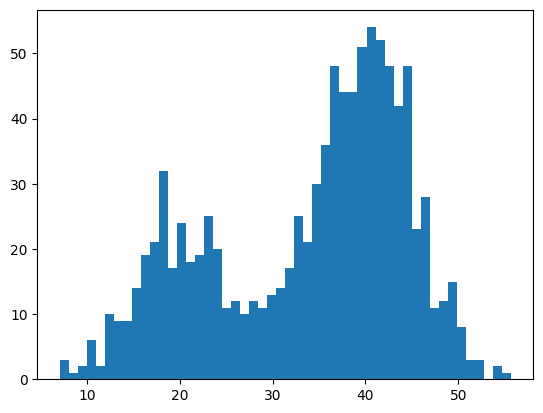

In [33]:
# Plotting Histogram with 50 bins
plt.hist(sample_kde, bins=50)

#### By Seaborn's seaborn.kdeplot for KDE

<Axes: ylabel='Density'>

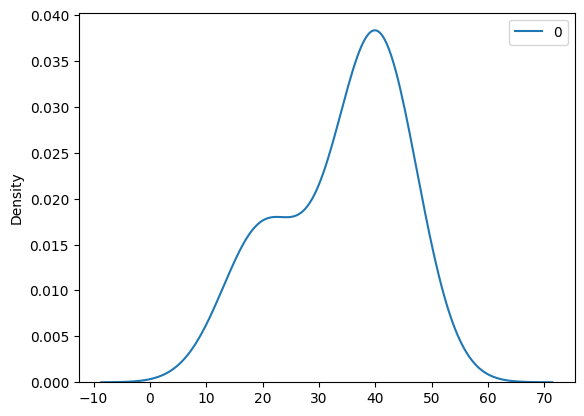

In [57]:
import seaborn as sns
sns.kdeplot( sample_kde, bw_adjust=2)

#### Both above plot in same figure

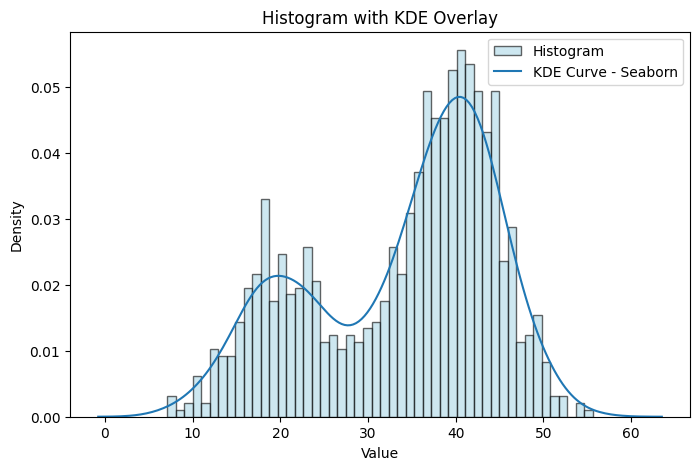

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(8, 5))

# Plot histogram
plt.hist(sample_kde, bins=50, color='lightblue', edgecolor='black', alpha=0.6, density=True, label='Histogram')

# Plot KDE
sns.kdeplot(sample_kde, bw_adjust=1, color='red', label='KDE Curve - Seaborn') # try with different bw_adjust value and see

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with KDE Overlay')
plt.legend()

# Show plot
plt.show()


#### By sklearn.neighbors.KernelDensity library from Scikit-learn for KDE

In [50]:
from sklearn.neighbors import KernelDensity

# Making object of KernelDensity Class, with sd=3 and kernel=gaussian
# Valid kernels are [‘gaussian’|’tophat’|’epanechnikov’|’exponential’|’linear’|’cosine’] Default is ‘gaussian’.
model =  KernelDensity(bandwidth=3, kernel='gaussian')  # If bandwidth decteased the KDE will try to touch every peak, means sharp while increasing will smoother the kde

# Convert data from 1D to 2D array. Now shape is (1000,1)
sample_kde_2d = sample_kde.reshape( len(sample_kde), 1 )

# Once the model is fit means it calculated the Y values
model.fit(sample_kde_2d)

#N.B: In Seaborn all the process done in single command : sns.kdeplot(sample_kde, bw_adjust=1, color='red', label='KDE Curve - Seaborn') 

KernelDensity(bandwidth=3)

In [51]:
# We will create 100 points between Max and Min of sample_kde and convert into 2D
values_kde = np.linspace( sample_kde.min(), sample_kde.max(), 100 )
values_kde_2d = values_kde.reshape( len(values_kde),1 )

In [52]:
# calculating probability density for the new of values_kde
probability_density_kde = model.score_samples( values_kde_2d )  # it returns Log values of Y

#convert log to normal value by Exponent
probability_density_kde = np.exp( probability_density_kde )


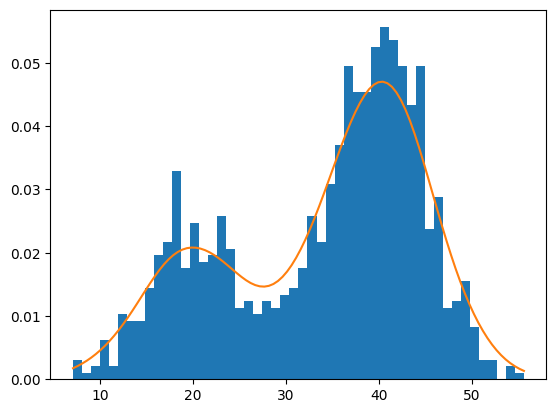

In [53]:
plt.hist( sample_kde_2d, bins=50, density=True )
plt.plot( values_kde_2d[:], probability_density_kde )
plt.show()

#### CDF (Cumulative Distribution Function) For PDF
Max. Probability is 1